In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)



In [2]:
team_standings = pd.read_csv('/Users/justintofteland/Downloads/Data/2023_5V5_Team_Standings.csv')
team_stats_5v5 = pd.read_csv('/Users/justintofteland/Downloads/Data/2023_5V5_Team_Stats.csv')

In [3]:
pd.set_option('display.max_columns', None)
team_stats_5v5.head()

,Name,Team,Season,GP,TOI,GF%,SF%,FF%,CF%,xGF%,GF/60,GA/60,SF/60,SA/60,FF/60,FA/60,CF/60,CA/60,xGF/60,xGA/60,G±/60,S±/60,F±/60,C±/60,xG±/60,Sh%,Sv%
0,Ducks,ANA,22-23,82,3991.82,38.44,39.98,40.07,40.76,38.80,2.12,3.40,26.23,39.38,35.77,53.50,47.66,69.28,2.21,3.49,-1.28,-13.15,-17.74,-21.62,-1.28,8.10,91.36
1,Coyotes,ARI,22-23,82,3874.00,44.97,43.23,43.63,43.84,44.14,2.29,2.81,25.15,33.03,35.45,45.81,47.47,60.82,2.27,2.88,-0.51,-7.88,-10.36,-13.35,-0.60,9.11,91.51
2,Bruins,BOS,22-23,82,3846.08,64.43,53.74,53.17,52.79,54.05,3.15,1.74,32.77,28.21,44.65,39.33,59.37,53.08,2.81,2.39,1.41,4.57,5.33,6.28,0.42,9.63,93.83
3,Sabres,BUF,22-23,82,4009.72,49.02,49.68,50.32,51.36,48.87,2.96,3.08,31.31,31.72,43.05,42.50,56.96,53.94,2.77,2.90,-0.12,-0.41,0.55,3.02,-0.13,9.46,90.29
4,Hurricanes,CAR,22-23,82,3939.88,55.75,59.05,60.76,61.52,59.88,2.66,2.11,34.80,24.13,51.74,33.41,69.42,43.42,3.25,2.17,0.55,10.66,18.33,26.00,1.07,7.64,91.26


In [4]:
 team_standings.head()

,Name,Team,Season,GP,TOI,W,L,OL,ROW,Points,Points%,GF,GA,G±,Sh%,Sv%,Streak
0,Bruins,BOS,22-23,82,4982.8,65,12,5,61,135,82.3,305,177,128,11.1,92.9,W8
1,Hurricanes,CAR,22-23,82,4990.5,52,21,9,48,113,68.9,266,213,53,9.2,90.1,W2
2,Devils,N.J,22-23,82,4987.8,52,22,8,50,112,68.3,291,226,65,10.2,90.4,W2
3,Golden Knights,VGK,22-23,82,4997.5,51,22,9,46,111,67.7,272,229,43,10.3,91.1,W2
4,Maple Leafs,TOR,22-23,82,4964.9,50,21,11,49,111,67.7,279,222,57,10.6,90.9,W4


In [5]:
# Team standings data is all situations. Reason for dropping columns

team_standings = team_standings.drop(columns=['Sh%', 'Sv%', 'TOI', 'Streak', 'GF', 'GA', 'G±'])
team_standings.head()

,Name,Team,Season,GP,W,L,OL,ROW,Points,Points%
0,Bruins,BOS,22-23,82,65,12,5,61,135,82.3
1,Hurricanes,CAR,22-23,82,52,21,9,48,113,68.9
2,Devils,N.J,22-23,82,52,22,8,50,112,68.3
3,Golden Knights,VGK,22-23,82,51,22,9,46,111,67.7
4,Maple Leafs,TOR,22-23,82,50,21,11,49,111,67.7


In [6]:
# Joining datasets

team_joined = pd.merge(team_stats_5v5, team_standings, on=['Name', 'Team', 'Season', 'GP'])
team_joined.head()

,Name,Team,Season,GP,TOI,GF%,SF%,FF%,CF%,xGF%,GF/60,GA/60,SF/60,SA/60,FF/60,FA/60,CF/60,CA/60,xGF/60,xGA/60,G±/60,S±/60,F±/60,C±/60,xG±/60,Sh%,Sv%,W,L,OL,ROW,Points,Points%
0,Ducks,ANA,22-23,82,3991.82,38.44,39.98,40.07,40.76,38.80,2.12,3.40,26.23,39.38,35.77,53.50,47.66,69.28,2.21,3.49,-1.28,-13.15,-17.74,-21.62,-1.28,8.10,91.36,23,47,12,20,58,35.4
1,Coyotes,ARI,22-23,82,3874.00,44.97,43.23,43.63,43.84,44.14,2.29,2.81,25.15,33.03,35.45,45.81,47.47,60.82,2.27,2.88,-0.51,-7.88,-10.36,-13.35,-0.60,9.11,91.51,28,40,14,25,70,42.7
2,Bruins,BOS,22-23,82,3846.08,64.43,53.74,53.17,52.79,54.05,3.15,1.74,32.77,28.21,44.65,39.33,59.37,53.08,2.81,2.39,1.41,4.57,5.33,6.28,0.42,9.63,93.83,65,12,5,61,135,82.3
3,Sabres,BUF,22-23,82,4009.72,49.02,49.68,50.32,51.36,48.87,2.96,3.08,31.31,31.72,43.05,42.50,56.96,53.94,2.77,2.90,-0.12,-0.41,0.55,3.02,-0.13,9.46,90.29,42,33,7,39,91,55.5
4,Hurricanes,CAR,22-23,82,3939.88,55.75,59.05,60.76,61.52,59.88,2.66,2.11,34.80,24.13,51.74,33.41,69.42,43.42,3.25,2.17,0.55,10.66,18.33,26.00,1.07,7.64,91.26,52,21,9,48,113,68.9


In [7]:
team_joined.columns

Index(['Name', 'Team', 'Season', 'GP', 'TOI', 'GF%', 'SF%', 'FF%', 'CF%',
       'xGF%', 'GF/60', 'GA/60', 'SF/60', 'SA/60', 'FF/60', 'FA/60', 'CF/60',
       'CA/60', 'xGF/60', 'xGA/60', 'G±/60', 'S±/60', 'F±/60', 'C±/60',
       'xG±/60', 'Sh%', 'Sv%', 'W', 'L', 'OL', 'ROW', 'Points', 'Points%'],
      dtype='object')

In [8]:
# Unnecessary columns for this analysis

team_joined = team_joined.drop(columns=['G±/60', 'S±/60', 'F±/60', 'C±/60',
       'xG±/60', 'OL', 'ROW', 'GP'])

In [9]:
team_joined.head()

,Name,Team,Season,TOI,GF%,SF%,FF%,CF%,xGF%,GF/60,GA/60,SF/60,SA/60,FF/60,FA/60,CF/60,CA/60,xGF/60,xGA/60,Sh%,Sv%,W,L,Points,Points%
0,Ducks,ANA,22-23,3991.82,38.44,39.98,40.07,40.76,38.80,2.12,3.40,26.23,39.38,35.77,53.50,47.66,69.28,2.21,3.49,8.10,91.36,23,47,58,35.4
1,Coyotes,ARI,22-23,3874.00,44.97,43.23,43.63,43.84,44.14,2.29,2.81,25.15,33.03,35.45,45.81,47.47,60.82,2.27,2.88,9.11,91.51,28,40,70,42.7
2,Bruins,BOS,22-23,3846.08,64.43,53.74,53.17,52.79,54.05,3.15,1.74,32.77,28.21,44.65,39.33,59.37,53.08,2.81,2.39,9.63,93.83,65,12,135,82.3
3,Sabres,BUF,22-23,4009.72,49.02,49.68,50.32,51.36,48.87,2.96,3.08,31.31,31.72,43.05,42.50,56.96,53.94,2.77,2.90,9.46,90.29,42,33,91,55.5
4,Hurricanes,CAR,22-23,3939.88,55.75,59.05,60.76,61.52,59.88,2.66,2.11,34.80,24.13,51.74,33.41,69.42,43.42,3.25,2.17,7.64,91.26,52,21,113,68.9


In [10]:
team_joined.isna().sum()

Name       0
Team       0
Season     0
TOI        0
GF%        0
SF%        0
FF%        0
CF%        0
xGF%       0
GF/60      0
GA/60      0
SF/60      0
SA/60      0
FF/60      0
FA/60      0
CF/60      0
CA/60      0
xGF/60     0
xGA/60     0
Sh%        0
Sv%        0
W          0
L          0
Points     0
Points%    0
dtype: int64

## Visualizations

Text(0, 0.5, 'xGF%')

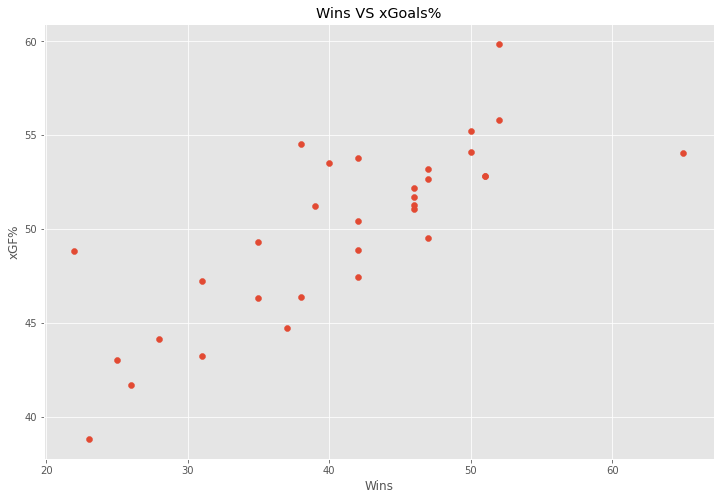

In [11]:
plt.scatter(x=team_joined['W'], y=team_joined['xGF%'])

plt.title('Wins VS xGoals%')
plt.xlabel('Wins')
plt.ylabel('xGF%')

### You can see a correlation between wins and xGF%

<Axes: xlabel='W', ylabel='xGF%'>

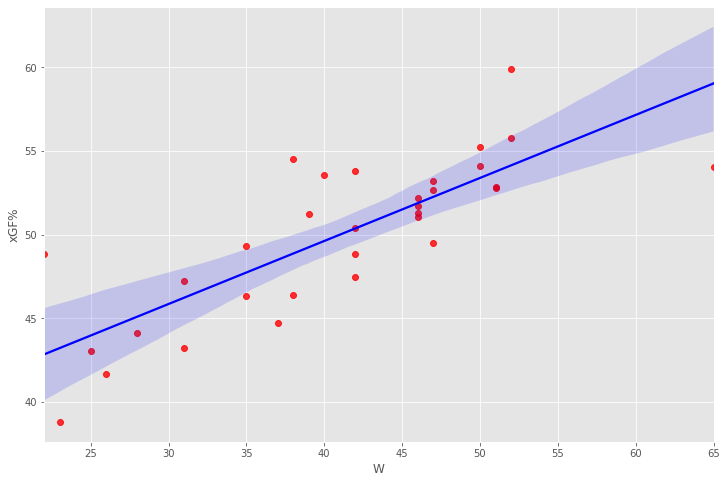

In [12]:
sns.regplot(x='W', y='xGF%', data=team_joined, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

### Teams at the top of the standings have the highest xGF%

In [14]:
fig = px.bar(team_joined.sort_values('xGF%', ascending = False), x='Team', y='xGF%')

fig.show()


### Carolina and Minnesota have a lower SH% but are towards the top of the league in Points

In [15]:
fig = px.bar(team_joined.sort_values('Sh%', ascending = False),x='Sh%', y='Team',color='Points', height=700)


fig.show()

### Sv% could help explain Minnesota being higher in the standings
### Carolina's SF% shows them generating more shots than giving up by a wide margin


In [16]:
fig = px.bar(team_joined.sort_values('Sv%', ascending = False),x='Sv%', y='Team',color='SF%',
             hover_data=['Name'],height=700)


fig.show()

### CF% is all shot attempts regardless if blocked or miss the net
### Carolina is at the top of that list


In [17]:
fig = px.scatter(team_joined, x="Points", y="CF%",
                 size='W', color='Sh%', hover_data=['W', 'Sh%', 'Sv%', 'Team'])
fig.show()

In [18]:
fig = px.bar(team_joined.sort_values('Points', ascending = False), x='Points', y='Team',
             hover_data=['W','L', 'xGF%','Sh%'], color='GF%', height=700)
fig.update_layout(title_text='Points in 22/23 Season')



fig.show()



#### Individual player data would help show some of the outliers. Players may have had career years or down years
